# Neural Network

In [1]:
from sklearn.datasets import load_iris                                 # Import the dataset
from sklearn.linear_model import Perceptron                            # Import perceptron
from sklearn.neural_network import MLPClassifier                       # Import Multilayer perceptron Classifier
from sklearn.preprocessing import LabelEncoder, StandardScaler         # Encoding categorical data
from sklearn.model_selection import train_test_split                   # Splitting dataset into traning and testing sets
from sklearn.metrics import classification_report, confusion_matrix    # Evaluting the performance of the classifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

# More performance metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart_disease.csv')

cat_features = df.select_dtypes(include = "object").columns

#Label Encoding for object to numeric conversion

le = LabelEncoder()

for col in cat_features:
    df[col] = le.fit_transform(df[col].astype(str))
    
y = df['HeartDisease']
X = df.drop('HeartDisease',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [4]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(128,64,32))
mlp_clf.fit(X_train, y_train)

y_pred = mlp_clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[28 18]
 [ 9 25]]
              precision    recall  f1-score   support

           0       0.76      0.61      0.67        46
           1       0.58      0.74      0.65        34

    accuracy                           0.66        80
   macro avg       0.67      0.67      0.66        80
weighted avg       0.68      0.66      0.66        80



C:\Users\gudev\anaconda3\envs\busa\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


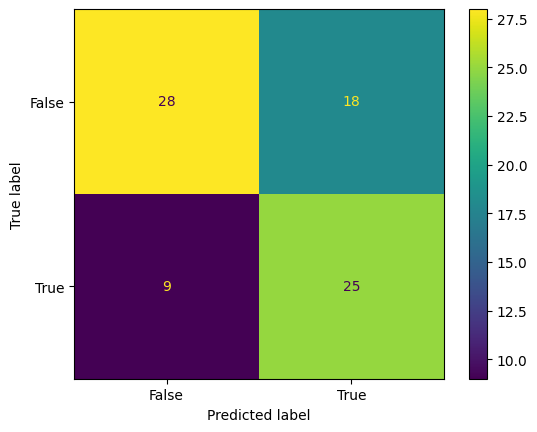

In [5]:
cfm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy: 0.662500
Precision: 0.581395
Recall: 0.735294
F1 score: 0.649351
ROC AUC: 0.683504


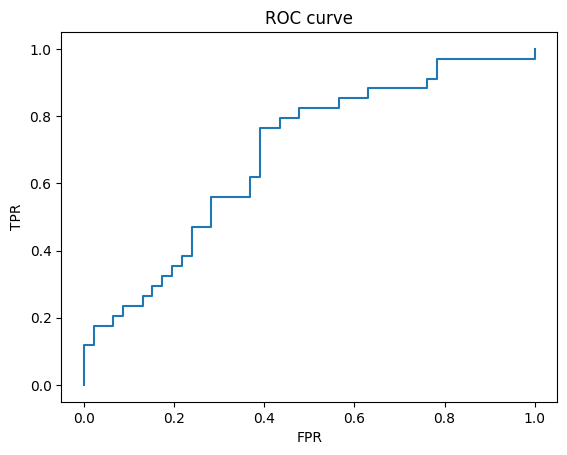

In [6]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
 
    
# ROC AUC
y_hat = mlp_clf.predict_proba(X_test)
auc = roc_auc_score(y_test, y_hat[:,1])
print('ROC AUC: %f' % auc)

fpr, tpr, _ = metrics.roc_curve(y_test, y_hat[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

Hyperparameters to tune:
- activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
- solver{‘lbfgs’, ‘sgd’, ‘adam’}
- learning_rate{‘constant’, ‘invscaling’, ‘adaptive’}
- learning_rate_init

In [3]:
GRID = [
    {'scaler': [StandardScaler()],
     'estimator': [MLPClassifier(random_state=1)],
     'estimator__solver': ['adam'],
     'estimator__learning_rate_init': [0.0001],
     'estimator__max_iter': [1000],
     'estimator__hidden_layer_sizes': [(500, 400, 300, 200, 100), (400, 400, 400, 400, 400), (300, 300, 300, 300, 300), (200, 200, 200, 200, 200)],
     'estimator__activation': ['logistic', 'tanh', 'relu'],
     'estimator__alpha': [0.0001, 0.001, 0.005],
     'estimator__early_stopping': [True, False]
     }
]

PIPELINE = Pipeline([('scaler', None), ('estimator', MLPClassifier())])

In [4]:
grid_search = GridSearchCV(estimator=PIPELINE, param_grid=GRID, 
                            scoring='average_precision', 
                            return_train_score=False, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=logistic, estimator__alpha=0.0001, estimator__early_stopping=True, estimator__hidden_layer_sizes=(500, 400, 300, 200, 100), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   0.8s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=logistic, estimator__alpha=0.0001, estimator__early_stopping=True, estimator__hidden_layer_sizes=(500, 400, 300, 200, 100), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   0.8s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=logistic, estimator__alpha=0.0001, estimator__early_stopping=True, estimator__hidden_layer_sizes=(500, 400, 300, 200, 100), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam

[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=logistic, estimator__alpha=0.0001, estimator__early_stopping=False, estimator__hidden_layer_sizes=(400, 400, 400, 400, 400), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   1.3s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=logistic, estimator__alpha=0.0001, estimator__early_stopping=False, estimator__hidden_layer_sizes=(400, 400, 400, 400, 400), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   1.5s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=logistic, estimator__alpha=0.0001, estimator__early_stopping=False, estimator__hidden_layer_sizes=(400, 400, 400, 400, 400), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   1.5s
[CV] END esti

[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=logistic, estimator__alpha=0.001, estimator__early_stopping=True, estimator__hidden_layer_sizes=(300, 300, 300, 300, 300), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   0.3s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=logistic, estimator__alpha=0.001, estimator__early_stopping=True, estimator__hidden_layer_sizes=(300, 300, 300, 300, 300), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   0.3s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=logistic, estimator__alpha=0.001, estimator__early_stopping=True, estimator__hidden_layer_sizes=(300, 300, 300, 300, 300), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   0.3s
[CV] END estimator=

[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=logistic, estimator__alpha=0.001, estimator__early_stopping=False, estimator__hidden_layer_sizes=(200, 200, 200, 200, 200), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   0.3s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=logistic, estimator__alpha=0.001, estimator__early_stopping=False, estimator__hidden_layer_sizes=(200, 200, 200, 200, 200), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   0.3s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=logistic, estimator__alpha=0.001, estimator__early_stopping=False, estimator__hidden_layer_sizes=(200, 200, 200, 200, 200), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   0.3s
[CV] END estimat

[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=logistic, estimator__alpha=0.005, estimator__early_stopping=False, estimator__hidden_layer_sizes=(500, 400, 300, 200, 100), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   1.1s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=logistic, estimator__alpha=0.005, estimator__early_stopping=False, estimator__hidden_layer_sizes=(500, 400, 300, 200, 100), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   1.8s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=logistic, estimator__alpha=0.005, estimator__early_stopping=False, estimator__hidden_layer_sizes=(500, 400, 300, 200, 100), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   2.1s
[CV] END estimat

[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=tanh, estimator__alpha=0.0001, estimator__early_stopping=True, estimator__hidden_layer_sizes=(400, 400, 400, 400, 400), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   1.0s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=tanh, estimator__alpha=0.0001, estimator__early_stopping=True, estimator__hidden_layer_sizes=(400, 400, 400, 400, 400), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   0.9s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=tanh, estimator__alpha=0.0001, estimator__early_stopping=True, estimator__hidden_layer_sizes=(300, 300, 300, 300, 300), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   0.5s
[CV] END estimator=MLPClassi

[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=tanh, estimator__alpha=0.0001, estimator__early_stopping=False, estimator__hidden_layer_sizes=(300, 300, 300, 300, 300), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=  16.3s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=tanh, estimator__alpha=0.0001, estimator__early_stopping=False, estimator__hidden_layer_sizes=(200, 200, 200, 200, 200), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=  10.7s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=tanh, estimator__alpha=0.0001, estimator__early_stopping=False, estimator__hidden_layer_sizes=(200, 200, 200, 200, 200), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   8.4s
[CV] END estimator=MLPCla

[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=tanh, estimator__alpha=0.001, estimator__early_stopping=False, estimator__hidden_layer_sizes=(500, 400, 300, 200, 100), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=  24.6s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=tanh, estimator__alpha=0.001, estimator__early_stopping=False, estimator__hidden_layer_sizes=(500, 400, 300, 200, 100), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=  23.6s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=tanh, estimator__alpha=0.001, estimator__early_stopping=False, estimator__hidden_layer_sizes=(500, 400, 300, 200, 100), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=  22.4s
[CV] END estimator=MLPClassi

[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=tanh, estimator__alpha=0.005, estimator__early_stopping=True, estimator__hidden_layer_sizes=(400, 400, 400, 400, 400), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   1.0s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=tanh, estimator__alpha=0.005, estimator__early_stopping=True, estimator__hidden_layer_sizes=(400, 400, 400, 400, 400), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   1.6s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=tanh, estimator__alpha=0.005, estimator__early_stopping=True, estimator__hidden_layer_sizes=(400, 400, 400, 400, 400), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   1.0s
[CV] END estimator=MLPClassifie

[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=tanh, estimator__alpha=0.005, estimator__early_stopping=False, estimator__hidden_layer_sizes=(300, 300, 300, 300, 300), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=  14.6s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=tanh, estimator__alpha=0.005, estimator__early_stopping=False, estimator__hidden_layer_sizes=(300, 300, 300, 300, 300), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=  14.4s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=tanh, estimator__alpha=0.005, estimator__early_stopping=False, estimator__hidden_layer_sizes=(300, 300, 300, 300, 300), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=  14.9s
[CV] END estimator=MLPClassi

[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=relu, estimator__alpha=0.0001, estimator__early_stopping=True, estimator__hidden_layer_sizes=(200, 200, 200, 200, 200), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   0.3s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=relu, estimator__alpha=0.0001, estimator__early_stopping=True, estimator__hidden_layer_sizes=(200, 200, 200, 200, 200), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   0.2s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=relu, estimator__alpha=0.0001, estimator__early_stopping=False, estimator__hidden_layer_sizes=(500, 400, 300, 200, 100), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   8.3s
[CV] END estimator=MLPClass

[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=relu, estimator__alpha=0.001, estimator__early_stopping=True, estimator__hidden_layer_sizes=(500, 400, 300, 200, 100), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   0.7s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=relu, estimator__alpha=0.001, estimator__early_stopping=True, estimator__hidden_layer_sizes=(400, 400, 400, 400, 400), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   1.9s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=relu, estimator__alpha=0.001, estimator__early_stopping=True, estimator__hidden_layer_sizes=(400, 400, 400, 400, 400), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   1.8s
[CV] END estimator=MLPClassifie

[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=relu, estimator__alpha=0.001, estimator__early_stopping=False, estimator__hidden_layer_sizes=(300, 300, 300, 300, 300), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   6.0s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=relu, estimator__alpha=0.001, estimator__early_stopping=False, estimator__hidden_layer_sizes=(300, 300, 300, 300, 300), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   6.1s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=relu, estimator__alpha=0.001, estimator__early_stopping=False, estimator__hidden_layer_sizes=(300, 300, 300, 300, 300), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   5.0s
[CV] END estimator=MLPClassi

[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=relu, estimator__alpha=0.005, estimator__early_stopping=True, estimator__hidden_layer_sizes=(200, 200, 200, 200, 200), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   0.3s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=relu, estimator__alpha=0.005, estimator__early_stopping=True, estimator__hidden_layer_sizes=(200, 200, 200, 200, 200), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   0.3s
[CV] END estimator=MLPClassifier(random_state=1), estimator__activation=relu, estimator__alpha=0.005, estimator__early_stopping=True, estimator__hidden_layer_sizes=(200, 200, 200, 200, 200), estimator__learning_rate_init=0.0001, estimator__max_iter=1000, estimator__solver=adam, scaler=StandardScaler(); total time=   0.3s
[CV] END estimator=MLPClassifie

GridSearchCV(estimator=Pipeline(steps=[('scaler', None),
                                       ('estimator', MLPClassifier())]),
             param_grid=[{'estimator': [MLPClassifier(activation='tanh',
                                                      early_stopping=True,
                                                      hidden_layer_sizes=(300,
                                                                          300,
                                                                          300,
                                                                          300,
                                                                          300),
                                                      learning_rate_init=0.0001,
                                                      max_iter=1000,
                                                      random_state=1)],
                          'estimator__activation': ['logistic', 'tanh', 'relu'],
                       

In [6]:
grid_search.best_params_

{'estimator': MLPClassifier(activation='tanh', early_stopping=True,
               hidden_layer_sizes=(300, 300, 300, 300, 300),
               learning_rate_init=0.0001, max_iter=1000, random_state=1),
 'estimator__activation': 'tanh',
 'estimator__alpha': 0.0001,
 'estimator__early_stopping': True,
 'estimator__hidden_layer_sizes': (300, 300, 300, 300, 300),
 'estimator__learning_rate_init': 0.0001,
 'estimator__max_iter': 1000,
 'estimator__solver': 'adam',
 'scaler': StandardScaler()}

In [5]:
final_model = grid_search.best_estimator_
train_predictions = final_model.predict(X_train)
test_predictions = final_model.predict(X_test)

print('Train Score:', accuracy_score(train_predictions, y_train)) # .99
print('Test Score:', accuracy_score(test_predictions, y_test)) # .8

Train Score: 0.71875
Test Score: 0.65
